## Conway's Game of Life

This is a 2D grid of cells, which can be on or off, 'living' or 'dead'. This grid changes over a series of generations.

Each cell has 8 neighbours (up, down, left, right and the diagonals). The number of neighbours of each cell determines whether it will live in the next generation:

* Cells with less than two neighbours will die
* Cells with two neighbours will stay alive if already alive
* Cells with three neighbours will come to life
* Cells with four or more neighbours will die

First, run the `import`s below that we'll need for the exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import random

## Starting out

Have a quick look through the rest of the worksheet to familiarise yourself. All of the code you need to edit is in the cells labelled:

```python
### Update the grid
```

and

```python
### Starting conditions
```

The eventual goal is that the function `update_cell()` will apply the Life rules as above. `update_grid` will run these rules on the whole grid, and return a new grid (the next generation of the cellular automaton).

Let's do something simpler first. In the section `### Update the grid`, edit `update_grid()` so that it:

* Creates a new grid the same shape as the one passed to it.
* Calls `update_cell` for each position in the grid, and puts the result in the same position in the new grid.
* Returns the new grid.

Once that's done, you'll be ready to edit `update_cell()` to apply the rules, and return a `0` if the cell is dead in the next generation, and `1` if it's alive.

First we should test the code though, and make sure everything works! So for now let's get `update_cell` to return a random `0` or `1`:

```python
def update_cell(x, y, grid):
    return random.choice([0, 1])
```

Run all of the rest of the cells to the end of the worksheet. When you get to the one marked ```### VIDEO```, after a short wait, you should see video of a randomly changing grid.


## A simple rule

Rather than going straight to the Life rules, let's try something simpler.

Change `update_cell` so that each cell is alive in the next generation if the cell to the left of it is alive.

Re-run the rest of the worksheet and look at the result.

## A less simple rule

Now change `update_cell` so that a cell is alive if two cells adjacent to it (up, down, left, right) are alive.

You'll have to work around the limits of the grid. If you like, for now you could just ignore the edges. (I.e., just update up to the second-last row and second-last column, and ignore the last row and last column).

## Life!

Now it's time to implement the Game of Life rules. As before, if you want you can ignore the last row and last column, to make things easier around the edges of the grid.

$\downarrow$ The code below will need to be filled out for the Game of Life to run.

In [2]:
### Update the grid

def update_cell(x, y, grid):
#     print(grid)
    y_lim, x_lim = grid.shape
    x_down, x_up = attentuate(x, x_lim)
    y_down, y_up = attentuate(y, y_lim)
    prev_state = grid[y, x]
#     grid[y, x] = 0
    grid_slice = grid[y_down:y_up, x_down:x_up]
    
#     print("x=", x, "y=", y)
#     print(grid_slice)

    slice_sum = np.sum(grid_slice) - prev_state
#     print("Slice sum =", slice_sum)
    
    if slice_sum < 2:
        new_state = 0
        
    elif slice_sum == 2:
        if prev_state == 1:
            new_state = 1
        else:
            new_state = 0
    
    elif slice_sum == 3:
        new_state = 1
    
    else:
        new_state = 0
        
        
    return new_state


def attentuate(x, x_lim):
    x_down = x - 1
    x_up = x + 1
    
    if x_down < 0:
        x_down = 0
    
    if x_up > x_lim:
        x_up = x_lim
        
    return x_down, x_up


def update_grid(grid):
#     print(grid)
    new_grid = np.empty(grid.shape)
    for (x, y), value in np.ndenumerate(grid):
        new_grid[x, y] = update_cell(x, y, grid)
    
    return new_grid

$\downarrow$ This code sets up the starting conditions.

In [3]:
### Starting conditions

# random grid
start_grid = np.random.randint(2,size=(100,100))

# glider
#start_grid = np.zeros((100,100))
#start_grid[50:53,52] = 1
#start_grid[52,51] = 1
#start_grid[51,50] = 1

$\downarrow$ This code sets up the plot where we'll display the grid -- you don't need to edit it.

/home/ignat/anaconda3/envs/ds/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


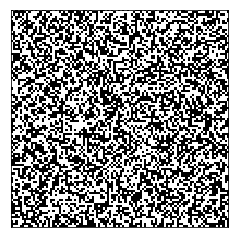

In [4]:
%matplotlib inline

fig = plt.figure()
ax = plt.axes()
image = plt.imshow(start_grid, interpolation='none')
plt.set_cmap("Greys")
plt.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
plt.tick_params(axis='y',which='both',left='off',right='off',labelleft='off')

$\downarrow$ The next three code cells are setup for the animation -- you don't need to edit them.

In [5]:
### Code to animate the grid -- do not modify
def init():
    return (image,)

In [6]:
### Code to animate the grid -- do not modify
def animate(_):
    global grid
    grid = update_grid(grid)
    image.set_data(grid)
    return (image,)

In [7]:
global grid
grid = start_grid
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=500, blit=True)

$\downarrow$ This cell creates a video of the generations of the grid.

In [8]:
HTML(anim.to_jshtml())

In [168]:
X = np.random.randn(5,3)

In [50]:
X.shape

(5, 3)

In [20]:
X

array([[-1.36395827,  2.42471585,  0.15596055],
       [ 0.76082177,  1.12131584, -2.17674541],
       [-0.2507756 ,  1.06932581, -0.90709633],
       [ 1.18977918, -0.12852285, -0.29917515],
       [ 2.31500307,  0.16992789, -0.35560223]])

In [25]:
X[4,2]

-0.35560222713199108